In [1]:
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential #sequential is required to initialise the neural network
from keras.layers import Dense      #dense is used to build the layers
from keras.layers import Dropout    #Dropout Layer in order to prevent Regularization in the network


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_file = "./stressSensorGait_dataset/abnormal_gait.csv"
gait = pd.read_csv(dataset_file)

In [3]:
x=gait.iloc[:,0:4]
y=gait.iloc[:,4:5]

print(x.head())
print(y.head())

   sensor1  sensor2  sensor3  sensor4
0      512      513      492      454
1      516      504      485      481
2      517      495      480      487
3      518      489      476      490
4      517      483      474      494
   labels
0  normal
1  normal
2  normal
3  normal
4  normal


In [4]:
# normalization

mu=np.mean(x,axis=0)
sigma = np.std(x, axis=0)
x= (x-mu)/sigma

In [5]:
# Divide test set and training set

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
le = preprocessing.LabelEncoder()
ytrain=le.fit_transform(ytrain.values.ravel())
ytest= le.fit_transform(ytest.values.ravel())


In [7]:
model = Sequential()

model.add(Dense(160,  input_dim = 4,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(160,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(80,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5,activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [9]:
history1=model.fit(xtrain, ytrain, batch_size=128, epochs=500)

Epoch 1/500
31/31 [==============================] - 2s 6ms/step - loss: 1.3674 - accuracy: 0.5078
Epoch 2/500
31/31 [==============================] - 0s 4ms/step - loss: 0.8177 - accuracy: 0.6701
Epoch 3/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5999 - accuracy: 0.7629
Epoch 4/500
31/31 [==============================] - 0s 4ms/step - loss: 0.5033 - accuracy: 0.8180
Epoch 5/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4589 - accuracy: 0.8390
Epoch 6/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8385
Epoch 7/500
31/31 [==============================] - 0s 4ms/step - loss: 0.4253 - accuracy: 0.8390
Epoch 8/500
31/31 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 0.8587
Epoch 9/500
31/31 [==============================] - 0s 4ms/step - loss: 0.3902 - accuracy: 0.8531
Epoch 10/500
31/31 [==============================] - 0s 4ms/step - loss: 0.3791 - accuracy: 0.8607
Epoch 11/

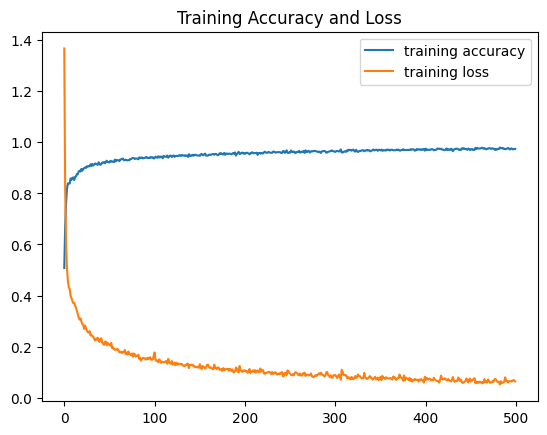

In [12]:
#训练集准确率和误差
acc = history1.history['accuracy']
loss = history1.history['loss']
plt.subplot()
plt.plot(acc, label='training accuracy')
plt.plot(loss, label='training loss')
plt.title('Training Accuracy and Loss')
plt.legend()

ANN_imagePath1 = './image/annAbnormalGaitTrainAccAndLoss.jpg'
plt.savefig(ANN_imagePath1, dpi=500, bbox_inches = 'tight') #保存图片

In [13]:
history2=model.fit(xtest, ytest, batch_size=64, epochs=100) 

Epoch 1/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4366 - accuracy: 0.9040
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2310 - accuracy: 0.9152
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1769 - accuracy: 0.9364
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.9414
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1503 - accuracy: 0.9556
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.9495
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1268 - accuracy: 0.9525
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1431 - accuracy: 0.9535
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.9596
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 0.9535
Epoch 11/

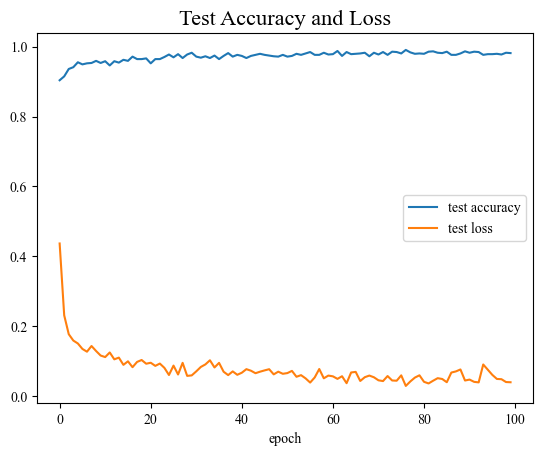

In [17]:
acc = history2.history['accuracy']
loss = history2.history['loss']


plt.subplot()
font='Times New Roman'

plt.xlabel("epoch")
# plt.yticks(fontproperties = 'Times New Roman', size = 14)
# plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rc('font',family='Times New Roman')
plt.plot(acc, label='test accuracy')
plt.plot(loss, label='test loss')
plt.title('Test Accuracy and Loss',fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.legend()

ANN_imagePath2 = './image/annAbnormalGaitTestAccAndLoss.jpg'
plt.savefig(ANN_imagePath2, dpi=500, bbox_inches = 'tight') #保存图片

In [18]:
acc,loss

([0.9040403962135315,
  0.9151515364646912,
  0.9363636374473572,
  0.9414141178131104,
  0.9555555582046509,
  0.9494949579238892,
  0.95252525806427,
  0.9535353779792786,
  0.9595959782600403,
  0.9535353779792786,
  0.9585858583450317,
  0.9464646577835083,
  0.9585858583450317,
  0.9545454382896423,
  0.9626262784004211,
  0.9595959782600403,
  0.9717171788215637,
  0.9646464586257935,
  0.9646464586257935,
  0.9666666388511658,
  0.95252525806427,
  0.9646464586257935,
  0.9646464586257935,
  0.9707070589065552,
  0.9777777791023254,
  0.9696969985961914,
  0.978787899017334,
  0.9676767587661743,
  0.9777777791023254,
  0.9828282594680786,
  0.9717171788215637,
  0.9686868786811829,
  0.9727272987365723,
  0.9676767587661743,
  0.9747474789619446,
  0.9646464586257935,
  0.973737359046936,
  0.9818181991577148,
  0.9717171788215637,
  0.9767676591873169,
  0.973737359046936,
  0.9676767587661743,
  0.973737359046936,
  0.9767676591873169,
  0.9797979593276978,
  0.97676765918731

In [19]:
y_pred=np.argmax(model.predict(xtest), axis=-1)
y_true=ytest

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

y_pred_test = model.predict(xtest)


matrix = metrics.confusion_matrix(y_pred, y_true)

labels = ["normal","parkinson","right hemiplegia", "left hemiplegia"]

31/31 [==============================] - 0s 2ms/step


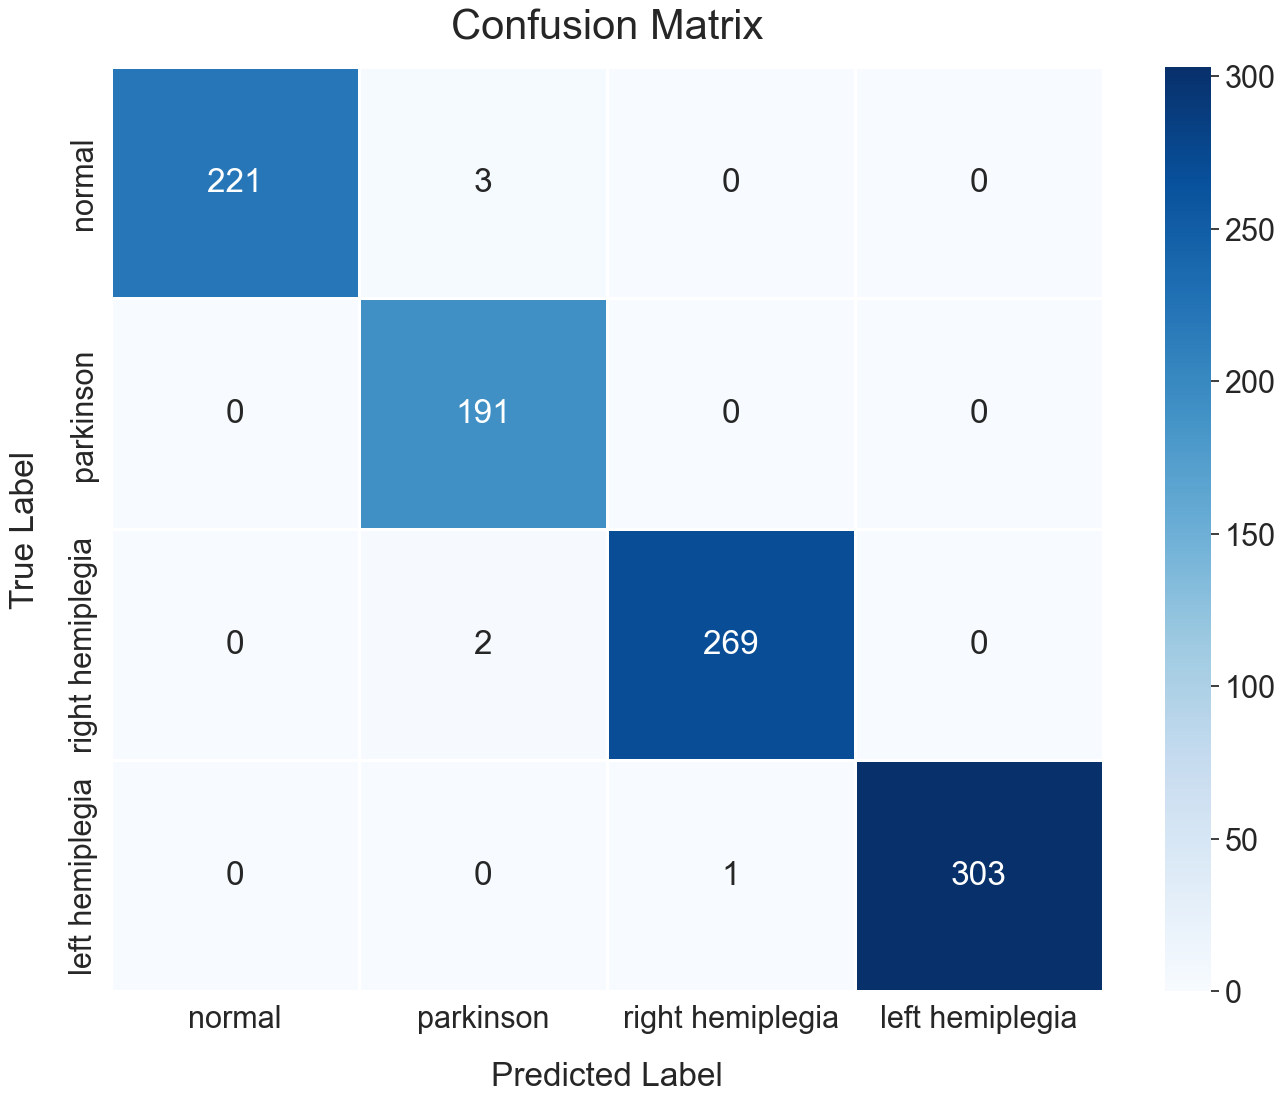

In [21]:
plt.figure(figsize=(16, 12))
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
sns.set(font_scale=2)
sns.heatmap(matrix,
            
            cmap="Blues",
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
#             fontfamily= "Times New Roman"，
            fmt="d")

plt.title("Confusion Matrix",fontdict={'size': 30},pad=20)
plt.ylabel("True Label",fontdict={'size': 24},labelpad=20)
plt.xlabel("Predicted Label",fontdict={'size': 24},labelpad=20)

ANN_imagePath2 = './image/annAbnormalConfusionMatrix.jpg'
plt.savefig(ANN_imagePath2, dpi=500, bbox_inches = 'tight') #保存图片
plt.show()
